# Final Project: Using voter registration & socioeconomic data to predict the 2016 election

# Executive Summary - Findings, Summary, Recommendation

### Project Overview

There's a lot of discussion about how voter registration & turnout impacts election results. This was most recently prevalent during the 2016 Presidential election. 

For this project, I plan to: 
- Join party registration, socioeconomic data, and election results by county. Layer in state voting laws. 
- Explore the relationship between various covariates & the outcome:
    - Outcome(s) - The main outcome I plan to look at is 2016 Presdiential election results, and specifically if the county voted for Trump or Clinton. 
    - Covariates inlucde:
        - State voter laws 
        - Registration information (% registered, party registration where available)
        - Voter turnout information
        - Race, education, & class socioeconomic data

### Possible Null Hypotheses

- There is no relationship between state voter laws & 2016 Presidential voting results
- There is no relationship between socioecnomic data & 2016 Presidential voting results
- There is no relationship between voter turnout & Presidential voting results
- There is no relationship between voter registration & Presidential voting results

### Recommendations & Findings

- I joined together data on socioecomic factors, state voting laws, voter turnout/registration, and votes per candidate
- Using Random Forest, I found an r-squared of ~95% on my training set and ~93% on my test set, which indicates to me that my model is strong and can account for ~93% of the variance in outcome (in this case which counties voted Trump vs. Clinton).
- Using Logistic Regression with the same covariates as Random Forest, I was able to achieve an ~87% accuracy.
- The Confusion Matrix for my random forest model had a precision & recall of ~91%. The model did a better job predicting Trump counties vs. Clinton counties.
- The Confusion Matrix for my logistic regression had a precision of 88% and recall of 87%. This model also did a better job predicting Trump counties vs. Clinton counties.
- Based on my Confusion Matrix outcomes, my Random Forest model outperforms my Logistic Regression model.
- The outcome of this data set could be used to recommend & inform future campaign strategy, and to help advocate for civil rights such as automatic voter registration (especially if we repeat the same analysis with "percent registered to vote" as the outcome)

# Analysis Part 1: Data cleaning, correlating, parsing, joining

In [398]:
# Our first step will be to import the packages we need

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns

In [399]:
ls

CountyCharacteristics.csv            PresidentialElectionResults2016.csv
CountyCharacteristics_cleaned.csv    States.csv
CountyCharacteristics_updated.csv    Terri-Shih-Final-Project.ipynb
PartyRegistration.csv


In [400]:
# Next, Let's go ahead and import in our data sets. There's going to be 4 of them, and we'll have to join them together!

df_ses = pd.read_csv("CountyCharacteristics.csv") #socioeconomic data by county
df_vote_registration = pd.read_csv("PartyRegistration.csv") #party registration data by county
df_pres_election_results = pd.read_csv("PresidentialElectionResults2016.csv") #socioeconomic data by county
df_states = pd.read_csv("States.csv") #state level voter laws

In [401]:
# OK. Now we've got our 4 data sets in. Let's get an idea of our data frame sizes

print df_ses.shape
print df_vote_registration.shape
print df_pres_election_results.shape
print df_states.shape

# O Dang. There are 85 different variables available to us for socioeconomic data! We probably shouldn't keep all of those in there interest of model simplicity & also our sanity

(3141, 85)
(3141, 22)
(3141, 18)
(51, 8)


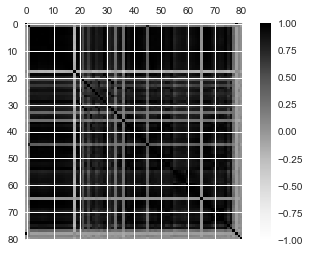

,County,MedianHouseholdIncome,TotalPopulation,Male,Female,Age0_4,Age5_9,Age10_14,Age15_19,Age20_24,...,BlindDisabledSSI,OASDI,SSIPayments,TotalReligiousAdherents,EvangelicalAdherents,CatholicAdherents,MormonAdherents,State,FoundryCounty,MexicanBorderCounty
County,1.000000,0.067116,-0.056199,-0.056485,-0.055911,-0.050042,-0.052198,-0.054043,-0.055648,-0.055601,...,-0.062658,-0.066757,-0.060970,-0.041826,-0.041717,-0.052814,0.017851,0.999975,0.089250,0.067691
MedianHouseholdIncome,0.067116,1.000000,0.240736,0.241549,0.239897,0.225163,0.241766,0.245316,0.237715,0.210551,...,0.116285,0.093374,0.096846,0.226594,0.151845,0.215286,0.098189,0.067560,0.131714,-0.084422
TotalPopulation,-0.056199,0.240736,1.000000,0.999878,0.999887,0.993822,0.992845,0.993800,0.995666,0.990912,...,0.927016,0.903805,0.918006,0.982892,0.837751,0.922834,0.337216,-0.055911,0.111819,0.036917
Male,-0.056485,0.241549,0.999878,1.000000,0.999531,0.994084,0.993391,0.994227,0.995954,0.991122,...,0.924295,0.903084,0.916502,0.982225,0.838495,0.922289,0.340897,-0.056197,0.110398,0.037674
Female,-0.055911,0.239897,0.999887,0.999531,1.000000,0.993340,0.992090,0.993161,0.995159,0.990482,...,0.929421,0.904292,0.919243,0.983309,0.836842,0.923145,0.333590,-0.055623,0.113162,0.036180
Age0_4,-0.050042,0.225163,0.993822,0.994084,0.993340,1.000000,0.997844,0.995710,0.993062,0.987887,...,0.926054,0.896446,0.912108,0.979440,0.861227,0.903243,0.362745,-0.049814,0.096701,0.046979
Age5_9,-0.052198,0.241766,0.992845,0.993391,0.992090,0.997844,1.000000,0.998742,0.994379,0.983160,...,0.910978,0.882282,0.897024,0.977008,0.866167,0.900030,0.366205,-0.051953,0.101863,0.043806
Age10_14,-0.054043,0.245316,0.993800,0.994227,0.993161,0.995710,0.998742,1.000000,0.996685,0.983521,...,0.912788,0.887738,0.901080,0.978613,0.856744,0.909634,0.361927,-0.053783,0.107640,0.043095
Age15_19,-0.055648,0.237715,0.995666,0.995954,0.995159,0.993062,0.994379,0.996685,1.000000,0.992471,...,0.924082,0.904703,0.916361,0.981506,0.840457,0.924458,0.347464,-0.055384,0.112920,0.043717
Age20_24,-0.055601,0.210551,0.990912,0.991122,0.990482,0.987887,0.983160,0.983521,0.992471,1.000000,...,0.936404,0.917847,0.929750,0.974735,0.829275,0.916972,0.347987,-0.055364,0.100656,0.046793


In [402]:
# Let's create a correlation matrix for the SES data. It's probably too much to keep all 85 covariates!

correlation = df_ses.corr()

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
plt.show()

correlation #print out the correlation results

# Well, that's not helpful. Let's try it again down below with a larger heatmap that Roy provided me

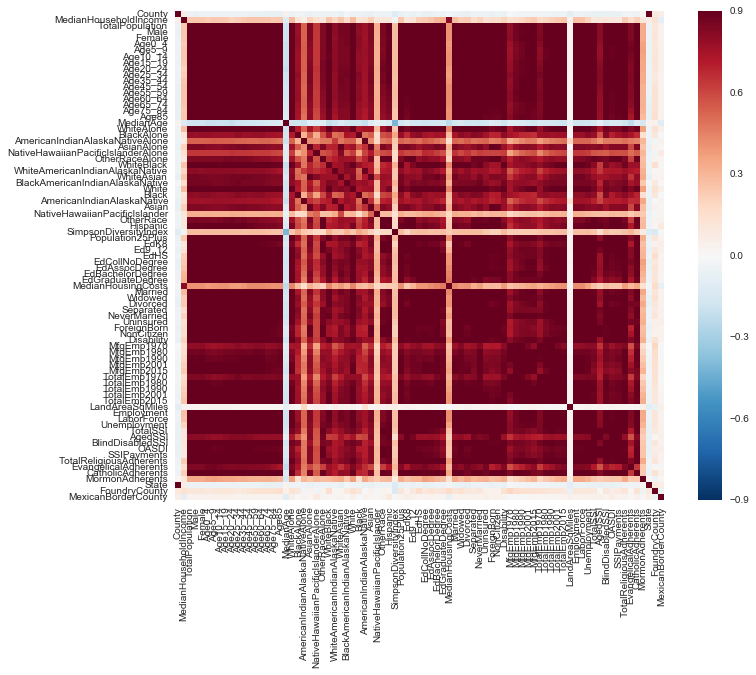

In [403]:
# What will this look like with a larger heatmap that Roy provided me?

corrmat = df_ses.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

# Hey! That's pretty neat. But, I still can't isolate any of the individual variables

### Excel Data Cleaning

- I am going to do a bit of data cleaning in Excel. Namely:
    - Remove some descriptive columns (e.g. I don't care as much about the breakdown of ages, e.g. 0-4, 4-10., and will just keep the median age
    - Rather than keep columns for every race, I am going to create 1 column for the percent of people who are White
    - Rather than keep for every education level, I am going to create 1 column for percent of people who have at least an associates degree
    - Turn some raw numbers into ratios/percentages (e.g. percent unemployed, percent uninsured, percent on disability, etc.)
- Note: I know that a lot of this is easy to do in Python (e.g. dropping columns, calculating percentages, etc.). In the interest of time, I will be manipulating this in Excel, but I wanted to acknowledge here that these are skills I'd ideally like to apply given additional time! I'll also be doing more cleaning / manipulating in Python later in the code!

In [404]:
# OK, let's import in our updated county characteristics

df_ses = pd.read_csv("CountyCharacteristics_updated.csv") #we will overwrite our original data frame for organization

In [405]:
print df_ses.shape
print df_vote_registration.shape
print df_pres_election_results.shape
print df_states.shape

# Whew, that's so, so much better! How, let's look at each of our data sets 1-by-1

(3141, 24)
(3141, 22)
(3141, 18)
(51, 8)


In [406]:
# Let's start with some counts

print "Socioeconomic data counts"
print df_ses.count() 

# This data looks mostly populated. I won't plan to drop any records yet.

Socioeconomic data counts
County                   3141
MedianHouseholdIncome    3140
TotalPopulation          3141
PopAbove20               3141
Citizens                 3141
MedianAge                3141
PctMale                  3141
PctWhite                 3141
PctCollegePlusEdu        3141
PctUninsured             3141
PctForeignBorn           3141
PctNonCitizen            3141
PctDisability            3141
PctUnemployed            3141
PctSSI                   3112
PctOASDI                 3030
MedianHousingCosts       3141
PctReligious             3139
WoodardAmericanNation    3141
LandAreaSqMiles          3141
NCHS_UrbanRural2013      3139
State                    3141
FoundryCounty            3141
MexicanBorderCounty      3141
dtype: int64


In [407]:
print "Voter registration data counts"
print df_vote_registration.count()

# This data is much, much more sparse. It's likely because it varies state-by-state if you can register by party.
# I'll keep this raw data as is, but it might be really interesting to look later at how results change based on if 
# The state allows you to register based on your party

Voter registration data counts
State                3141
County               3141
Year                 3141
Month                3141
D                    1425
G                     528
L                     918
N                    3062
O                    1101
R                    1425
TotalRegistration    3141
dPct                 1425
rPct                 1425
leanD                1425
leanR                1425
unaffiliatedPct      3141
otherPct             1425
dDRPct               1425
rDRPct               1425
CountyName           3141
StateName            3141
StateAbbr            3141
dtype: int64


In [408]:
print "Presidential election data counts"
print df_pres_election_results.count()

# This table looks well populated. My immediate though for missing records is that those counties had sufficiently
# Small enough of a population where no votes for a 3rd party candidate were recorded

Presidential election data counts
County        3141
clinton       3141
trump         3141
johnson       3141
stein         2822
other         2902
totalvotes    3141
CountyName    3141
StateName     3141
StateAbbr     3141
dPct          3141
rPct          3141
leanD         3141
leanR         3141
otherPct      2902
dDRPct        3141
rDRPct        3141
State         3141
dtype: int64


In [409]:
print "State voting rights data counts"
print df_states.count()

# Every state is populated with voter ID information

State voting rights data counts
State                      51
StateName                  51
StateAbbr                  51
ElectoralVotes             51
AllowsPartyRegistration    51
VoterIDLaw                 51
VoterIDLawVerbose          51
ClosedPrimary              51
dtype: int64


In [410]:
# Let's start with a good old describe
print "Here is a describe table for socioeconomic data"
print df_ses.describe()
print "Here is a describe table for voter registration data"
print df_vote_registration.describe()
print "Here is a describe table for presidential election data"
print df_pres_election_results.describe()
print "Here is a describe table for state data"
print df_states.describe()

# Hmm, this isn't extremely helpful. Let's try correlation matrices instead

Here is a describe table for socioeconomic data
             County  MedianHouseholdIncome  TotalPopulation    PopAbove20  \
count   3141.000000            3140.000000     3.141000e+03  3.141000e+03   
mean   30388.545368           46824.208280     1.007688e+05  7.451979e+04   
std    15162.438257           12248.256362     3.230809e+05  2.383135e+05   
min     1001.000000           19328.000000     1.170000e+02  1.110000e+02   
25%    18179.000000           38825.500000     1.103100e+04  8.238000e+03   
50%    29177.000000           45094.500000     2.578300e+04  1.918100e+04   
75%    45081.000000           52247.750000     6.758200e+04  5.043400e+04   
max    56045.000000          123453.000000     1.003839e+07  7.430816e+06   

           Citizens    MedianAge      PctMale     PctWhite  PctCollegePlusEdu  \
count  3.141000e+03  3141.000000  3141.000000  3141.000000        3141.000000   
mean   9.374436e+04    40.868577     0.501006     0.856074           0.195969   
std    2.803946

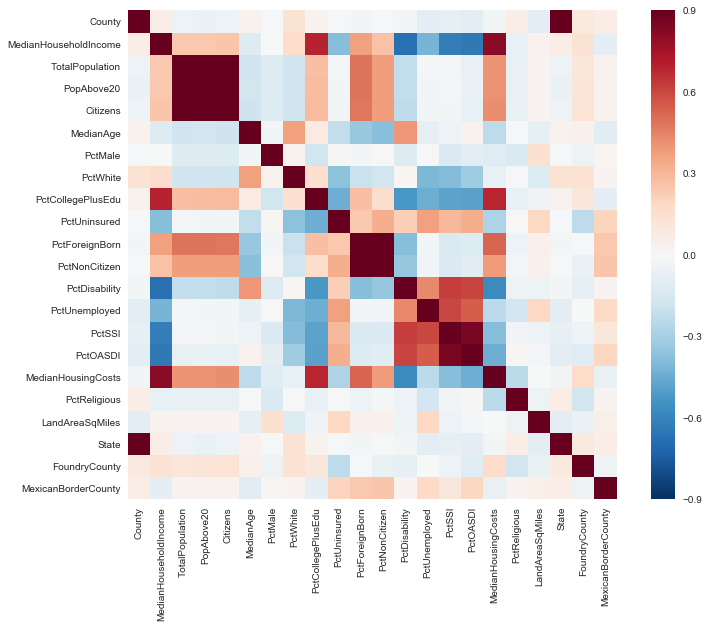

In [411]:
# Let's use that neat code that Roy shared with me and try a correlation matrix now with each of our data frames

corrmat = df_ses.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

# Now that is more like it! The red & dark red or blue & dark blue indicates variables that are highly correlated - either popstively or negatively
# A lot of these make sense - e.g. Household Income is highly correlated positively with Median housing costs
# State is highly correlated with county 
# Median housing costs are somewhat positively correlated with populations, which makes sense as cities are generally more expensive than rural areas

In [412]:
# Based on this matrix, I am going to drop median housing costs, pct Foreign born, pct OASDI, as that will likely confound any modeling I do
# There is a very strong linear relationship between median housing & HHI, and OASDI & SSI (both are programs that target benefits for the elderly)
# And Pct Foreign Born & Pct Non Citizen
df_ses.drop(['MedianHousingCosts', 'PctOASDI', 'PctForeignBorn'], axis=1, inplace=True)

print df_ses.head

<bound method DataFrame.head of       County  MedianHouseholdIncome  TotalPopulation  PopAbove20  Citizens  \
0       1001                51281.0            55221       39741     54747   
1       1003                50254.0           195121      147179    191033   
2       1005                32964.0            26932       20641     26478   
3       1007                38678.0            22604       16990     22437   
4       1009                45813.0            57710       42548     55908   
5       1011                31938.0            10678        8312     10291   
6       1013                32229.0            20354       15268     20309   
7       1015                41703.0           116648       87346    114655   
8       1017                34177.0            34079       25994     33800   
9       1019                36296.0            26008       20158     25946   
10      1021                41627.0            43819       32278     42040   
11      1023                3353

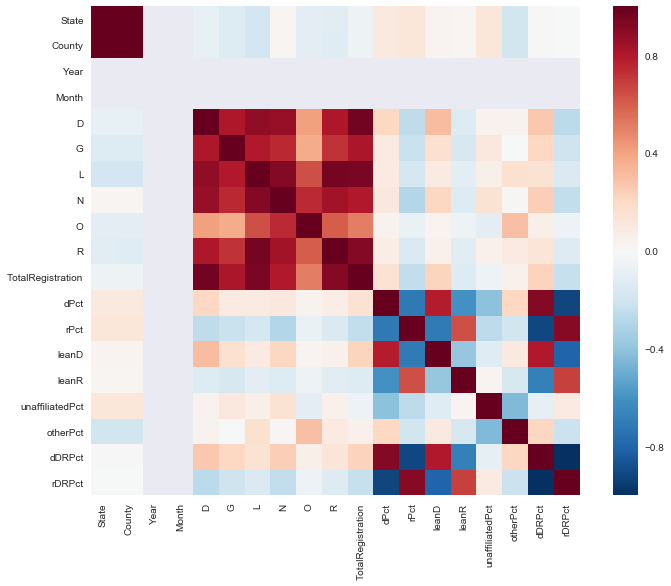

In [413]:
# Let's use that neat code that Roy shared with me and try a correlation matrix now with each of our data frames

corrmat = df_vote_registration.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

# This clearly has a lot of strong positive & negative correlations, as this data set includes both raw numbers (e.g. number of registered Republicans)
# As well as percentages (e.g. percent of voters that are Republican)
# This is really going to mess up models we might do!

In [414]:
# Based on this matrix, I am going to drop all raw numbers (e.g. number of Republicans)
# I am also only going to keep the percentages, and drop any columns related to leaning Dem/Republican
# Also, since all the year & month data is the same, I will drop that too

df_vote_registration.drop(['Year','Month','D','G','L','N','O','R','leanD','leanR','dDRPct', 'rDRPct'], axis=1, inplace=True)

In [415]:
# Hey! Look how much cleaner that dataset looks!
df_vote_registration.head()

,State,County,TotalRegistration,dPct,rPct,unaffiliatedPct,otherPct,CountyName,StateName,StateAbbr
0,1,1001,34310.0,NaN,NaN,1.0,NaN,Autauga,Alabama,AL
1,1,1003,128743.0,NaN,NaN,1.0,NaN,Baldwin,Alabama,AL
2,1,1005,16218.0,NaN,NaN,1.0,NaN,Barbour,Alabama,AL
3,1,1007,12108.0,NaN,NaN,1.0,NaN,Bibb,Alabama,AL
4,1,1009,34276.0,NaN,NaN,1.0,NaN,Blount,Alabama,AL


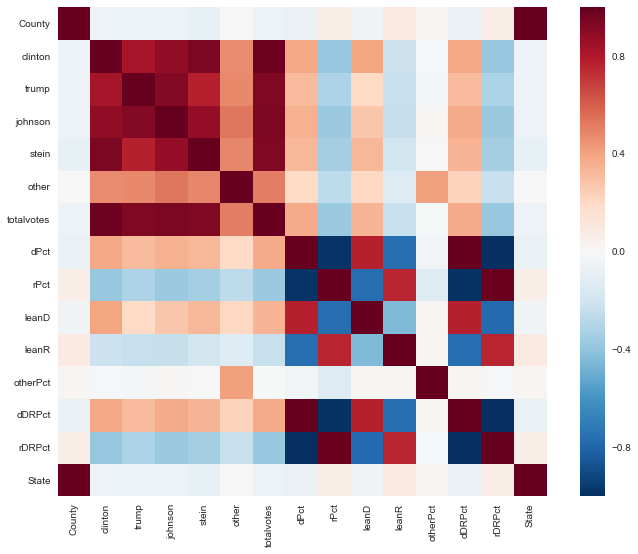

In [416]:
# One more correlation matrix now for Presidential Election data!

corrmat = df_pres_election_results.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [417]:
# Similar to the above matrix on registration data, we're going to only keep data on the total votes and the ratio of
# Democratic to Republican voters in that county

df_pres_election_results.drop(['clinton','trump','johnson','stein','other','dPct','rPct','leanD','leanR','otherPct'], axis=1, inplace=True)

In [418]:
# Hey Look how much cleaner that looks! 
df_pres_election_results.head()

,County,totalvotes,CountyName,StateName,StateAbbr,dDRPct,rDRPct,State
0,1001,24973,Autauga,Alabama,AL,0.246225,0.753775,1
1,1003,95215,Baldwin,Alabama,AL,0.202078,0.797922,1
2,1005,10469,Barbour,Alabama,AL,0.471768,0.528232,1
3,1007,8819,Bibb,Alabama,AL,0.217603,0.782397,1
4,1009,25588,Blount,Alabama,AL,0.086188,0.913812,1


In [419]:
print df_ses.head()
print df_vote_registration.head()
print df_states.head()
print df_pres_election_results.head()

   County  MedianHouseholdIncome  TotalPopulation  PopAbove20  Citizens  \
0    1001                51281.0            55221       39741     54747   
1    1003                50254.0           195121      147179    191033   
2    1005                32964.0            26932       20641     26478   
3    1007                38678.0            22604       16990     22437   
4    1009                45813.0            57710       42548     55908   

   MedianAge  PctMale  PctWhite  PctCollegePlusEdu  PctUninsured  \
0       37.7     0.48      0.79               0.20          0.10   
1       42.2     0.49      0.88               0.27          0.13   
2       38.8     0.54      0.49               0.14          0.14   
3       38.9     0.53      0.78               0.12          0.09   
4       40.7     0.49      0.97               0.16          0.12   

          ...           PctDisability  PctUnemployed  PctSSI  PctReligious  \
0         ...                    0.17           0.05    0.03  

In [420]:
# OK, now let's get a little crazy and join all of our data sets together, so we have 1 massive data set
# We've got some overlapping column names, so we'll have to be smart about suffixes so that we don't end up with column dupe errors

ses_registration = df_ses.merge(df_vote_registration, on = 'County')
ses_reg_votes = ses_registration.merge(df_pres_election_results, on = 'County')
all_the_data = ses_reg_votes.merge(df_states, on = 'State')

In [421]:
# Woohoo! We've got all the data
all_the_data.head()

,County,MedianHouseholdIncome,TotalPopulation,PopAbove20,Citizens,MedianAge,PctMale,PctWhite,PctCollegePlusEdu,PctUninsured,...,dDRPct,rDRPct,State,StateName,StateAbbr,ElectoralVotes,AllowsPartyRegistration,VoterIDLaw,VoterIDLawVerbose,ClosedPrimary
0,1001,51281.0,55221,39741,54747,37.7,0.48,0.79,0.20,0.10,...,0.246225,0.753775,1,Alabama,AL,9,False,3,Non-strict photo ID,False
1,1003,50254.0,195121,147179,191033,42.2,0.49,0.88,0.27,0.13,...,0.202078,0.797922,1,Alabama,AL,9,False,3,Non-strict photo ID,False
2,1005,32964.0,26932,20641,26478,38.8,0.54,0.49,0.14,0.14,...,0.471768,0.528232,1,Alabama,AL,9,False,3,Non-strict photo ID,False
3,1007,38678.0,22604,16990,22437,38.9,0.53,0.78,0.12,0.09,...,0.217603,0.782397,1,Alabama,AL,9,False,3,Non-strict photo ID,False
4,1009,45813.0,57710,42548,55908,40.7,0.49,0.97,0.16,0.12,...,0.086188,0.913812,1,Alabama,AL,9,False,3,Non-strict photo ID,False


In [422]:
all_the_data.columns

Index([u'County', u'MedianHouseholdIncome', u'TotalPopulation', u'PopAbove20',
       u'Citizens', u'MedianAge', u'PctMale', u'PctWhite',
       u'PctCollegePlusEdu', u'PctUninsured', u'PctNonCitizen',
       u'PctDisability', u'PctUnemployed', u'PctSSI', u'PctReligious',
       u'WoodardAmericanNation', u'LandAreaSqMiles', u'NCHS_UrbanRural2013',
       u'State_x', u'FoundryCounty', u'MexicanBorderCounty', u'State_y',
       u'TotalRegistration', u'dPct', u'rPct', u'unaffiliatedPct', u'otherPct',
       u'CountyName_x', u'StateName_x', u'StateAbbr_x', u'totalvotes',
       u'CountyName_y', u'StateName_y', u'StateAbbr_y', u'dDRPct', u'rDRPct',
       u'State', u'StateName', u'StateAbbr', u'ElectoralVotes',
       u'AllowsPartyRegistration', u'VoterIDLaw', u'VoterIDLawVerbose',
       u'ClosedPrimary'],
      dtype='object')

In [423]:
# We need to remove the columns that got suffixed with an _x or _y because it was a repeat column

all_the_data.drop(['State_x','CountyName_x','StateName_x','StateAbbr_x','State_y','StateName_y','CountyName_y','StateName_y','StateAbbr_y','FoundryCounty'], axis=1, inplace=True)

In [424]:
#awesome! all of the suffixed duplicate columns are gone
all_the_data.head()

,County,MedianHouseholdIncome,TotalPopulation,PopAbove20,Citizens,MedianAge,PctMale,PctWhite,PctCollegePlusEdu,PctUninsured,...,dDRPct,rDRPct,State,StateName,StateAbbr,ElectoralVotes,AllowsPartyRegistration,VoterIDLaw,VoterIDLawVerbose,ClosedPrimary
0,1001,51281.0,55221,39741,54747,37.7,0.48,0.79,0.20,0.10,...,0.246225,0.753775,1,Alabama,AL,9,False,3,Non-strict photo ID,False
1,1003,50254.0,195121,147179,191033,42.2,0.49,0.88,0.27,0.13,...,0.202078,0.797922,1,Alabama,AL,9,False,3,Non-strict photo ID,False
2,1005,32964.0,26932,20641,26478,38.8,0.54,0.49,0.14,0.14,...,0.471768,0.528232,1,Alabama,AL,9,False,3,Non-strict photo ID,False
3,1007,38678.0,22604,16990,22437,38.9,0.53,0.78,0.12,0.09,...,0.217603,0.782397,1,Alabama,AL,9,False,3,Non-strict photo ID,False
4,1009,45813.0,57710,42548,55908,40.7,0.49,0.97,0.16,0.12,...,0.086188,0.913812,1,Alabama,AL,9,False,3,Non-strict photo ID,False


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121f76b90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x118b4c950>]], dtype=object)

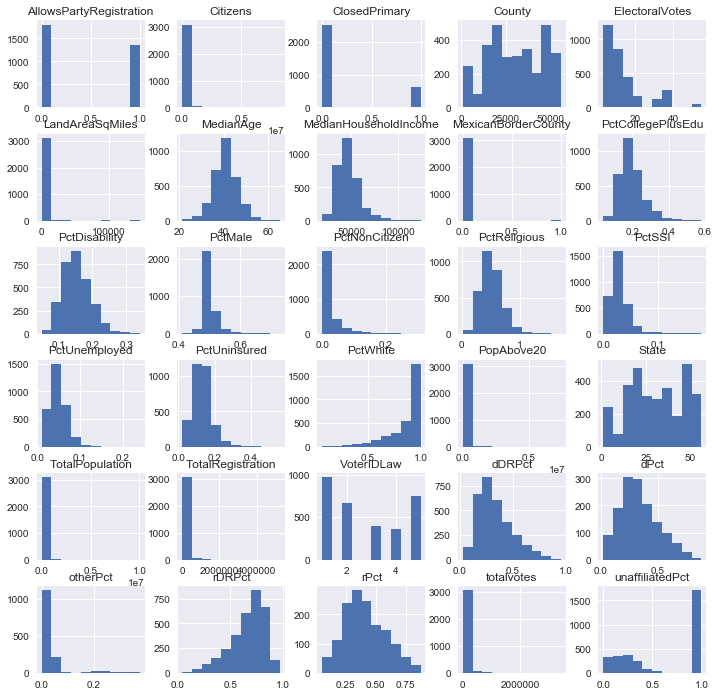

In [425]:
# Let's do some histograms on each of our variables so we can get an idea of distribution

all_the_data.hist(figsize=(12,12))

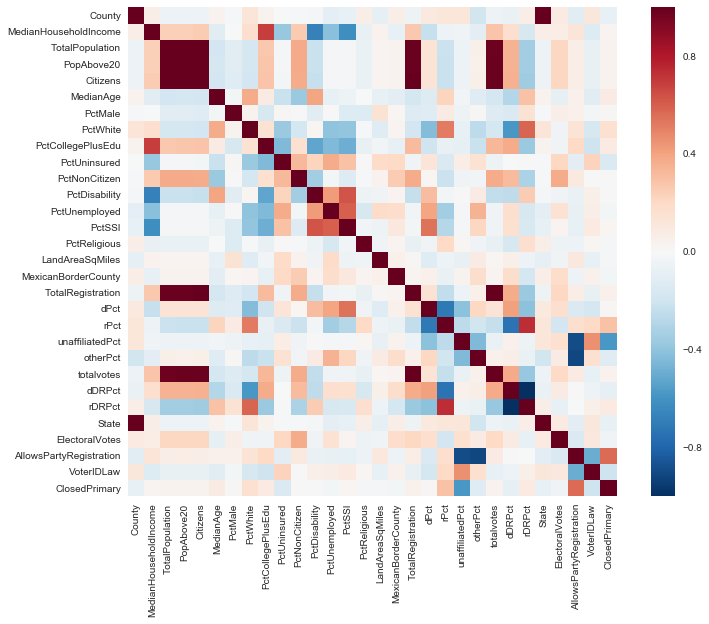

In [426]:
# Let's do a correlation matrix now to look at how all of our merged data sets are correlated

corrmat = all_the_data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

# Immediate observations: Total population is highly positively correlated with population above 20, Number of citizens, Total number of registered voters, total number of voters
# States allowing party registration is negatively correlated with a high percentage of "unaffiliated" voters
# We will keep these columns for now but drop them when we get into modeling

# Now that we have a finalized data set, let's create a data dictionary

Note: Woodward American Nation categories found here: http://colinwoodard.blogspot.com/2015/02/population-figures-for-american-nations.html

Variable | Description | Type of Variable
---| ---| ---
County | Code tied to US County | categorial/discrete
MedianHouseholdIncome | Median household income | continuous
TotalPopulation| Total population by county | categorical
PopAbove20| Number of people above age 20 | categorical
Citizens | Number of people who are citizens | categorical
MedianAge | Median age of resident | continuous
PctMale| Percent of residents that are male | continuous
PctWhite| Percent of residents that are White | continuous
PctCollegePlusEdu| Percent of residents with at least an Associates degree | continuous
PctUninsured| Percent of residents that are unisured | continuous
PctForeignBorn (removed)| Percent of residents not born in the US | continuous
PctNonCitizen| Percent of residents who are not US citizens | continuous
PctDisability| Percent of residents who are on Disability | continuous
PctUnemployed| Percent of residents who are in the Labor Force but unemployed | continuous
PctSSI| Percent of residents who are on Supplemental Security Income for elderly | continuous
PctOASDI (removed)| Percent of residents who are on Social Security | continuous
PctReligious| Percent of residents who identify as religious| continuous
WoodardAmericanNation| Regional classifications (i.e. Deep South, Appalachia) | categorical
LandAreaSqMiles| Area of county in square miles |  continuous
NCHS_UrbanRural2013| Classification of area (e.g. metro, rural, etc) |  categorical
MexicanBorderCounty| Boolean for if the county borders Mexico  |  categorical / boolean
TotalRegistration| Total number of voters registered - 2016 |  categorical
dPct| Percent of voters that are registered Democrats - 2016  |  continuous
rPct| Percent of voters that are registered Republicans - 2016 |  continuous
unaffiliatedPct| Percent of voters that are Unaffiliated - 2016 |  continuous
otherPct| Percent of voters that registered for a 3rd Party - 2016 |  continuous
totalvotes| Total number of votes cast in the 2016 Presdiential election | categorical
dDRPct| Pct of votes that were Democratic (out of Democractic & Repub votes) |  continuous
rDRPct| Pct of votes that were Republican (out of Democractic & Repub votes) |  continuous
State| State that the county is in (2 letter abbreviation) |  categorical
StateName| Full name of state that the county is in |  categorical
StateAbbr| Area of county in square miles |  categorical
ElectoralVotes| Number of electoral votes that state has|  categorical
AllowsPartyRegistration| True/False boolean for if the State allows voters to register for a party |  categorical/boolean
VoterIDLaw| State voter ID law - number |  categorical
VoterIDLawVerbose| State voter ID law - description (e.g. strict photo, no photo required, etc.) | categorical
ClosedPrimary| True/False boolean for if the State has closed primaries. |  categorical / boolean

# Analysis Part 2 - Calculate Additional Variables

Before digging into modeling, I want to create 3 additional variables that I think might be helpful/interesting:

- Percent of residents that are registered to vote in 2016
- Percent of registered voters who voted in 2016
- Flag for if the county voted Democratic or Republican in 2016

Assumption Time! Ideally we'd be able to look at citizens who are above the age of 18. However, while we know the number of citizens, and the number of people over the age of 20, we don't have all the information we'd need on percent of eligible citizens who are able to vote. We also don't know the number of citizens who are not eligible to vote, e.g. due to felonies. Therefore, we will proxy "voter registration percentages" by calculating the % of adults registered to vote like this:

- TotalRegistration / PopAbove20

In [427]:
# Let's create a variable for percentage of residents that are registered to vote

all_the_data['registeredtovote_pct'] = (all_the_data['TotalRegistration'] * 1.0) / all_the_data['PopAbove20']

In [428]:
# Print the first few records to ensure we calculated it correctly. We did, yay!
all_the_data[['TotalRegistration', 'PopAbove20','registeredtovote_pct']].head()

,TotalRegistration,PopAbove20,registeredtovote_pct
0,34310.0,39741,0.863340
1,128743.0,147179,0.874738
2,16218.0,20641,0.785718
3,12108.0,16990,0.712655
4,34276.0,42548,0.805584


In [429]:
# Let's create a variable for percentage of registered voters who voted in the 2016 election
all_the_data['voted2016_pct'] = (all_the_data['totalvotes'] * 1.0) / all_the_data['TotalRegistration']

In [430]:
# Print the first few records to ensure we calculated it correctly. We did, yay!
all_the_data[['totalvotes','TotalRegistration','voted2016_pct']].head()

,totalvotes,TotalRegistration,voted2016_pct
0,24973,34310.0,0.727864
1,95215,128743.0,0.739574
2,10469,16218.0,0.645517
3,8819,12108.0,0.728361
4,25588,34276.0,0.746528


In [431]:
all_the_data[['registeredtovote_pct','voted2016_pct']].describe()

#Hmm, OK we can see that there's some messiness in this data. Namely, that it doesn't make sense that > 100% of people were registered to vote, or did vote
# Let's drop any records where either of those percentages are above 100%

,registeredtovote_pct,voted2016_pct
count,3141.000000,3141.000000
mean,0.869401,0.695369
std,0.125642,0.352188
min,0.329142,0.348556
25%,0.789549,0.631639
50%,0.873834,0.691956
75%,0.949200,0.744196
max,2.040469,19.716800


In [432]:
# Drop any rows where registered to vote pct > 1
all_the_data.drop(all_the_data[all_the_data.registeredtovote_pct > 1].index, inplace=True)

In [433]:
# Drop any rows where % who voted is > 1
all_the_data.drop(all_the_data[all_the_data.voted2016_pct > 1].index, inplace=True)

In [434]:
# OK that is way better. We lost ~400 records, but I'd prefer this vs. falsely categorizing some counties as registering > 100% of people to vote
all_the_data[['registeredtovote_pct','voted2016_pct']].describe()

,registeredtovote_pct,voted2016_pct
count,2700.000000,2700.000000
mean,0.838090,0.697756
std,0.101709,0.091953
min,0.329142,0.348556
25%,0.775383,0.644010
50%,0.851941,0.698051
75%,0.917423,0.749555
max,0.999696,0.985586


In [435]:
# Finally, let's create a conditional variable based on how the county voted in 2016 to signal if the county went Republican or Democrat
# I want 1 column that writes out who the county voted for, and 1 column that codes a 1 for democrat and 0 for republican
# This will allow me to do pivots with the string, and percentage calculations for the number

all_the_data['county_vote_2016'] = all_the_data['dDRPct'].apply(lambda x: "clinton" if x>0.5 else 'trump')
all_the_data['county_voted_dem_bool'] = all_the_data['dDRPct'].apply(lambda x: 1 if x>0.5 else 0)

# We will apply a Lambda function that assigns "Clinton" if the % of votes that are democratic is > 50%, an "Trump" otherwise.
# Thanks Chris! 

In [436]:
# Yay!
all_the_data.head()

,County,MedianHouseholdIncome,TotalPopulation,PopAbove20,Citizens,MedianAge,PctMale,PctWhite,PctCollegePlusEdu,PctUninsured,...,StateAbbr,ElectoralVotes,AllowsPartyRegistration,VoterIDLaw,VoterIDLawVerbose,ClosedPrimary,registeredtovote_pct,voted2016_pct,county_vote_2016,county_voted_dem_bool
0,1001,51281.0,55221,39741,54747,37.7,0.48,0.79,0.20,0.10,...,AL,9,False,3,Non-strict photo ID,False,0.863340,0.727864,trump,0
1,1003,50254.0,195121,147179,191033,42.2,0.49,0.88,0.27,0.13,...,AL,9,False,3,Non-strict photo ID,False,0.874738,0.739574,trump,0
2,1005,32964.0,26932,20641,26478,38.8,0.54,0.49,0.14,0.14,...,AL,9,False,3,Non-strict photo ID,False,0.785718,0.645517,trump,0
3,1007,38678.0,22604,16990,22437,38.9,0.53,0.78,0.12,0.09,...,AL,9,False,3,Non-strict photo ID,False,0.712655,0.728361,trump,0
4,1009,45813.0,57710,42548,55908,40.7,0.49,0.97,0.16,0.12,...,AL,9,False,3,Non-strict photo ID,False,0.805584,0.746528,trump,0


In [437]:
# Check out all these dope new columns we added!
all_the_data[['registeredtovote_pct','voted2016_pct','county_vote_2016','county_voted_dem_bool']].head()

,registeredtovote_pct,voted2016_pct,county_vote_2016,county_voted_dem_bool
0,0.863340,0.727864,trump,0
1,0.874738,0.739574,trump,0
2,0.785718,0.645517,trump,0
3,0.712655,0.728361,trump,0
4,0.805584,0.746528,trump,0


# Analysis Part 3 - Deeper Analysis & Modeling

### Let's do some basic bar charts to get some visuals on what factors might influence how a county voted in 2016. 

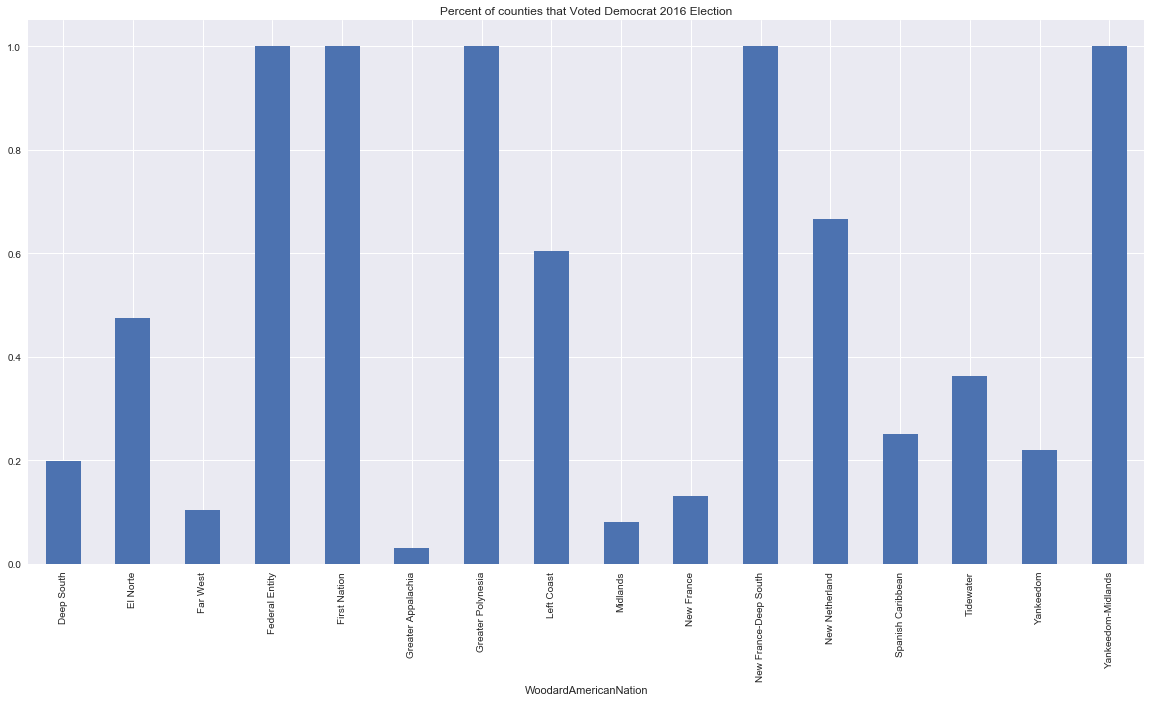

In [438]:
# Let's do some basic charts on the 2016 election results
# Let's look at some bar charts based on regional classifications

all_the_data.groupby('WoodardAmericanNation').county_voted_dem_bool.mean().plot(kind='bar', title = "Percent of counties that Voted Democrat 2016 Election", figsize=(20,10))

# Dang! There's a huge variation in how many counties voted for Clinton in 2016 based on region
# Perhaps unsurprisingly, areas like the Deep South and Appalachia voted overwhelmingly Republican
# Whereas areas such as "First Nation" (Native American landscapes) and Federal Entity (DC) voted overwhelmingly Democrat
# What's more: areas that are traditionally thought of as "very liberal" (i.e. the Left Coast, Yankeedom) aren't necessarily overwhelmingly Democrat
# I think the main thing to remember here is that we are looking here at counties, and not number of voters.
# So, there are many counties in "yankeedom", and while many of those people probably live concentrated in a few counties
# And comprise the most voters/votes, from a county perspective, many counties could have voted Republican but just had fewer people

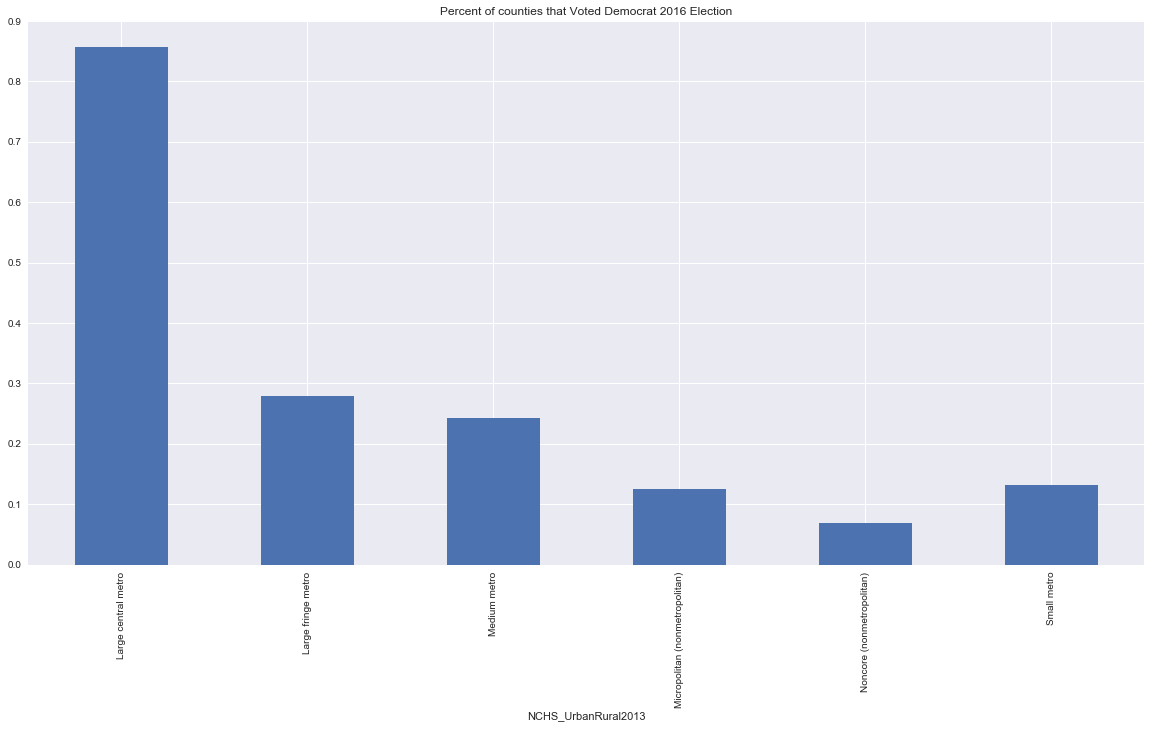

In [439]:
# Let's look at some bar charts based on how counties voted based on their population density

all_the_data.groupby('NCHS_UrbanRural2013').county_voted_dem_bool.mean().plot(kind='bar', title = "Percent of counties that Voted Democrat 2016 Election", figsize=(20,10))

# Perhaps unsurprisingly, counties in large central metro areas voted overwhelmingly Democrat, and as 
# Metro area become more fringe, smaller, or rural, you're less likely to see counties vote Democrat

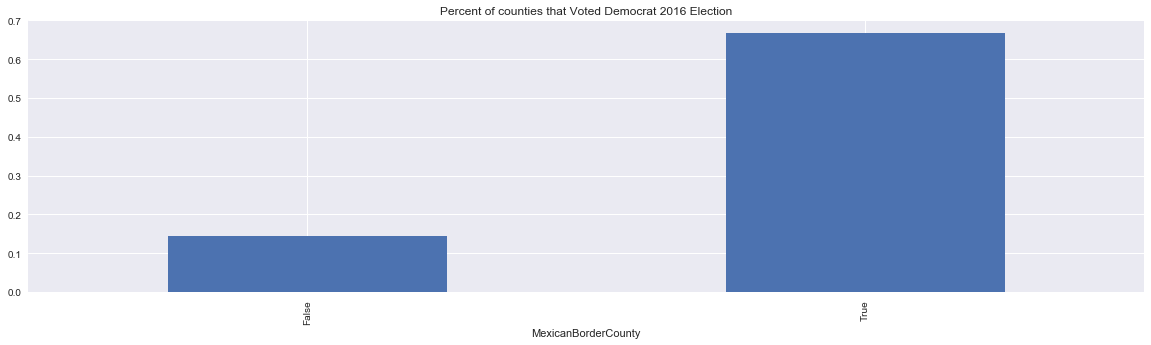

In [440]:
# How about based on counties that do/don't border Mexico?
all_the_data.groupby('MexicanBorderCounty').county_voted_dem_bool.mean().plot(kind='bar', title = "Percent of counties that Voted Democrat 2016 Election", figsize=(20,5))

# Wow. Counties that border Mexico overwhelmingly voted Democrat in 2016, even though states in the South are generally safely republican
# It's also worth noting here that there are a lot of counties in the US, and most of them did vote Republican in 2016, even though
# The majority of people voted for Clinton. This is because a large percentage of the population is concentrated in 
# Only a few counties, and those counties with high concentration overwhelmingly voted Democrat. 

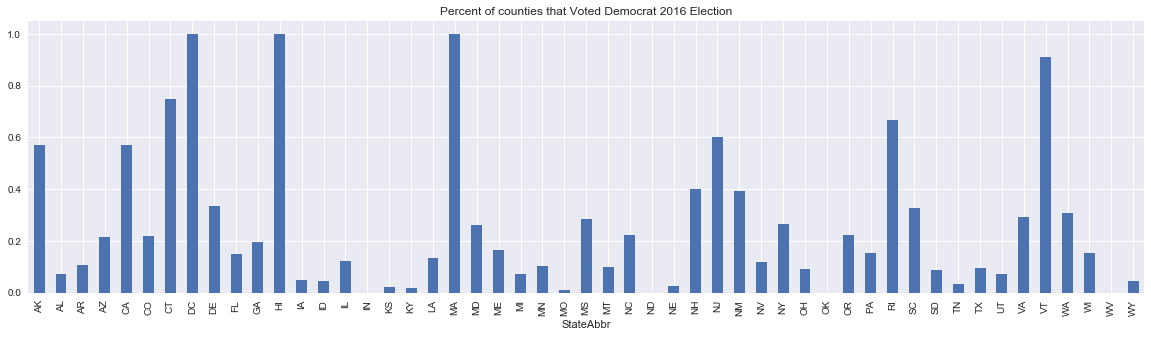

In [441]:
# State by state results!
all_the_data.groupby('StateAbbr').county_voted_dem_bool.mean().plot(kind='bar', title = "Percent of counties that Voted Democrat 2016 Election", figsize=(20,5))

# Interesting call out - Illinois is considered a "democratic stronghold", but I think this visual really highlights
# Now much of that is swayed by a handful of counties - namely Cook county. On a county/by/county level, fewer than
# 20% of counties in Illinois voted for Clinton in 2016, but because of the size of Chicago & a few other smaller cities,
# The state still was safely democratic. Compare this with other safely democratic states, such as Hawaii, MA, and DC, 
# But those are consistently more Democratic across all counties, in large part likely because they are much smaller states / territories,
# With a much higher population density

### Analysis/Modeling: Random Forest Classifier

I've decided to start with Random Forest Classifier, since I'm trying to predict a discrete variable (If a county went Trump vs. Clinton in 2016).

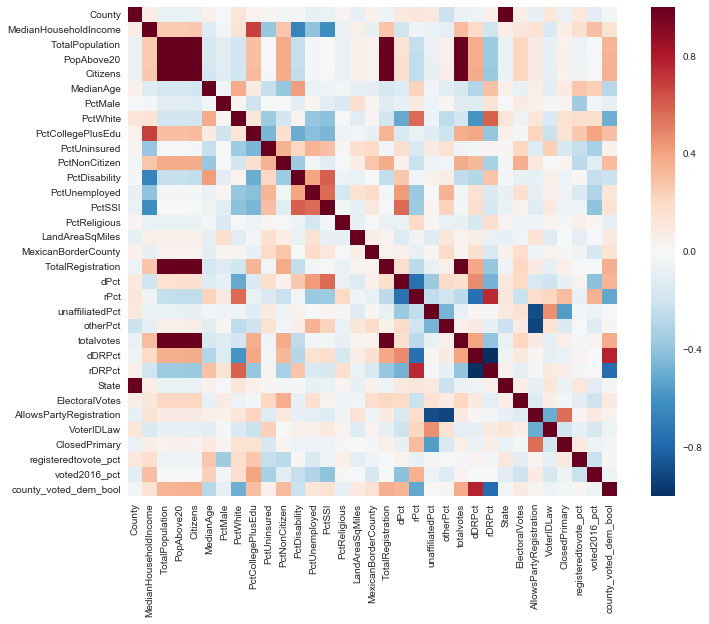

In [442]:
# To see what I want to dig into, let's do another correlation matrix with our new varaibles.
# This time, however, I am thinking of relationships to outcomes.

corrmat = all_the_data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [443]:
all_the_data.head()

,County,MedianHouseholdIncome,TotalPopulation,PopAbove20,Citizens,MedianAge,PctMale,PctWhite,PctCollegePlusEdu,PctUninsured,...,StateAbbr,ElectoralVotes,AllowsPartyRegistration,VoterIDLaw,VoterIDLawVerbose,ClosedPrimary,registeredtovote_pct,voted2016_pct,county_vote_2016,county_voted_dem_bool
0,1001,51281.0,55221,39741,54747,37.7,0.48,0.79,0.20,0.10,...,AL,9,False,3,Non-strict photo ID,False,0.863340,0.727864,trump,0
1,1003,50254.0,195121,147179,191033,42.2,0.49,0.88,0.27,0.13,...,AL,9,False,3,Non-strict photo ID,False,0.874738,0.739574,trump,0
2,1005,32964.0,26932,20641,26478,38.8,0.54,0.49,0.14,0.14,...,AL,9,False,3,Non-strict photo ID,False,0.785718,0.645517,trump,0
3,1007,38678.0,22604,16990,22437,38.9,0.53,0.78,0.12,0.09,...,AL,9,False,3,Non-strict photo ID,False,0.712655,0.728361,trump,0
4,1009,45813.0,57710,42548,55908,40.7,0.49,0.97,0.16,0.12,...,AL,9,False,3,Non-strict photo ID,False,0.805584,0.746528,trump,0


In [444]:
all_the_data.columns

Index([u'County', u'MedianHouseholdIncome', u'TotalPopulation', u'PopAbove20',
       u'Citizens', u'MedianAge', u'PctMale', u'PctWhite',
       u'PctCollegePlusEdu', u'PctUninsured', u'PctNonCitizen',
       u'PctDisability', u'PctUnemployed', u'PctSSI', u'PctReligious',
       u'WoodardAmericanNation', u'LandAreaSqMiles', u'NCHS_UrbanRural2013',
       u'MexicanBorderCounty', u'TotalRegistration', u'dPct', u'rPct',
       u'unaffiliatedPct', u'otherPct', u'totalvotes', u'dDRPct', u'rDRPct',
       u'State', u'StateName', u'StateAbbr', u'ElectoralVotes',
       u'AllowsPartyRegistration', u'VoterIDLaw', u'VoterIDLawVerbose',
       u'ClosedPrimary', u'registeredtovote_pct', u'voted2016_pct',
       u'county_vote_2016', u'county_voted_dem_bool'],
      dtype='object')

In [445]:
# Let's create a modified data frame that drops fields we don't want in our model, e.g. the boolean for if a county voted Democrat or not
# I'm also going to drop the state & county, because I think it'll be interesting to see how the model fares without this information

all_the_data_updated = all_the_data.drop(['County','State','StateName','StateAbbr','VoterIDLaw','county_voted_dem_bool'], axis=1)

In [446]:
all_the_data_updated.columns

Index([u'MedianHouseholdIncome', u'TotalPopulation', u'PopAbove20',
       u'Citizens', u'MedianAge', u'PctMale', u'PctWhite',
       u'PctCollegePlusEdu', u'PctUninsured', u'PctNonCitizen',
       u'PctDisability', u'PctUnemployed', u'PctSSI', u'PctReligious',
       u'WoodardAmericanNation', u'LandAreaSqMiles', u'NCHS_UrbanRural2013',
       u'MexicanBorderCounty', u'TotalRegistration', u'dPct', u'rPct',
       u'unaffiliatedPct', u'otherPct', u'totalvotes', u'dDRPct', u'rDRPct',
       u'ElectoralVotes', u'AllowsPartyRegistration', u'VoterIDLawVerbose',
       u'ClosedPrimary', u'registeredtovote_pct', u'voted2016_pct',
       u'county_vote_2016'],
      dtype='object')

In [447]:
# Since we can only do Random Forest Classifier on Floats/integers, we need to create some dummy variables

dummy_ranks = pd.get_dummies(all_the_data_updated['VoterIDLawVerbose'], prefix='voterid_')
print dummy_ranks.head()

   voterid__No ID requirement  voterid__Non-strict non-photo ID  \
0                           0                                 0   
1                           0                                 0   
2                           0                                 0   
3                           0                                 0   
4                           0                                 0   

   voterid__Non-strict photo ID  voterid__Strict non-photo ID  \
0                             1                             0   
1                             1                             0   
2                             1                             0   
3                             1                             0   
4                             1                             0   

   voterid__Strict photo ID  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  


In [448]:
# Let's create a dummy variable for regional information 

dummy_ranks_2 = pd.get_dummies(all_the_data_updated['WoodardAmericanNation'], prefix='woodward_')
print dummy_ranks_2.head()

   woodward__Deep South  woodward__El Norte  woodward__Far West  \
0                     1                   0                   0   
1                     1                   0                   0   
2                     1                   0                   0   
3                     1                   0                   0   
4                     0                   0                   0   

   woodward__Federal Entity  woodward__First Nation  \
0                         0                       0   
1                         0                       0   
2                         0                       0   
3                         0                       0   
4                         0                       0   

   woodward__Greater Appalachia  woodward__Greater Polynesia  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3         

In [449]:
# Finally, let's create a dummy variable for urban/rural classification

dummy_ranks_3 = pd.get_dummies(all_the_data_updated['NCHS_UrbanRural2013'], prefix='urbanrural_')
print dummy_ranks_3.head()

   urbanrural__Large central metro  urbanrural__Large fringe metro  \
0                                0                               0   
1                                0                               0   
2                                0                               0   
3                                0                               1   
4                                0                               1   

   urbanrural__Medium metro  urbanrural__Micropolitan (nonmetropolitan)  \
0                         1                                           0   
1                         0                                           0   
2                         0                                           0   
3                         0                                           0   
4                         0                                           0   

   urbanrural__Noncore (nonmetropolitan)  urbanrural__Small metro  
0                                      0                    

In [450]:
all_the_data_updated = all_the_data_updated.join([dummy_ranks, dummy_ranks_2, dummy_ranks_3]) 

In [451]:
all_the_data_updated.shape

(2700, 60)

In [452]:
all_the_data_updated.columns

Index([u'MedianHouseholdIncome', u'TotalPopulation', u'PopAbove20',
       u'Citizens', u'MedianAge', u'PctMale', u'PctWhite',
       u'PctCollegePlusEdu', u'PctUninsured', u'PctNonCitizen',
       u'PctDisability', u'PctUnemployed', u'PctSSI', u'PctReligious',
       u'WoodardAmericanNation', u'LandAreaSqMiles', u'NCHS_UrbanRural2013',
       u'MexicanBorderCounty', u'TotalRegistration', u'dPct', u'rPct',
       u'unaffiliatedPct', u'otherPct', u'totalvotes', u'dDRPct', u'rDRPct',
       u'ElectoralVotes', u'AllowsPartyRegistration', u'VoterIDLawVerbose',
       u'ClosedPrimary', u'registeredtovote_pct', u'voted2016_pct',
       u'county_vote_2016', u'voterid__No ID requirement',
       u'voterid__Non-strict non-photo ID', u'voterid__Non-strict photo ID',
       u'voterid__Strict non-photo ID', u'voterid__Strict photo ID',
       u'woodward__Deep South', u'woodward__El Norte', u'woodward__Far West',
       u'woodward__Federal Entity', u'woodward__First Nation',
       u'woodward__Grea

In [453]:
# Yay! We've got dummy variables!
all_the_data_updated.head()

,MedianHouseholdIncome,TotalPopulation,PopAbove20,Citizens,MedianAge,PctMale,PctWhite,PctCollegePlusEdu,PctUninsured,PctNonCitizen,...,woodward__Spanish Caribbean,woodward__Tidewater,woodward__Yankeedom,woodward__Yankeedom-Midlands,urbanrural__Large central metro,urbanrural__Large fringe metro,urbanrural__Medium metro,urbanrural__Micropolitan (nonmetropolitan),urbanrural__Noncore (nonmetropolitan),urbanrural__Small metro
0,51281.0,55221,39741,54747,37.7,0.48,0.79,0.20,0.10,0.01,...,0,0,0,0,0,0,1,0,0,0
1,50254.0,195121,147179,191033,42.2,0.49,0.88,0.27,0.13,0.02,...,0,0,0,0,0,0,0,0,0,1
2,32964.0,26932,20641,26478,38.8,0.54,0.49,0.14,0.14,0.02,...,0,0,0,0,0,0,0,0,1,0
3,38678.0,22604,16990,22437,38.9,0.53,0.78,0.12,0.09,0.01,...,0,0,0,0,0,1,0,0,0,0
4,45813.0,57710,42548,55908,40.7,0.49,0.97,0.16,0.12,0.03,...,0,0,0,0,0,1,0,0,0,0


In [454]:
# Let's create our first features & results. 
# Our features should not include the actual outcome, fields we created into dummy variables, or the raw numbers that contribute to the outcome (i.e. number of republican or democratic votes)
features = all_the_data_updated.drop(['county_vote_2016','dDRPct','rDRPct','VoterIDLawVerbose','WoodardAmericanNation','NCHS_UrbanRural2013'], axis=1)
results = all_the_data_updated['county_vote_2016']

In [455]:
features.head()

,MedianHouseholdIncome,TotalPopulation,PopAbove20,Citizens,MedianAge,PctMale,PctWhite,PctCollegePlusEdu,PctUninsured,PctNonCitizen,...,woodward__Spanish Caribbean,woodward__Tidewater,woodward__Yankeedom,woodward__Yankeedom-Midlands,urbanrural__Large central metro,urbanrural__Large fringe metro,urbanrural__Medium metro,urbanrural__Micropolitan (nonmetropolitan),urbanrural__Noncore (nonmetropolitan),urbanrural__Small metro
0,51281.0,55221,39741,54747,37.7,0.48,0.79,0.20,0.10,0.01,...,0,0,0,0,0,0,1,0,0,0
1,50254.0,195121,147179,191033,42.2,0.49,0.88,0.27,0.13,0.02,...,0,0,0,0,0,0,0,0,0,1
2,32964.0,26932,20641,26478,38.8,0.54,0.49,0.14,0.14,0.02,...,0,0,0,0,0,0,0,0,1,0
3,38678.0,22604,16990,22437,38.9,0.53,0.78,0.12,0.09,0.01,...,0,0,0,0,0,1,0,0,0,0
4,45813.0,57710,42548,55908,40.7,0.49,0.97,0.16,0.12,0.03,...,0,0,0,0,0,1,0,0,0,0


In [456]:
features.dtypes

MedianHouseholdIncome                         float64
TotalPopulation                                 int64
PopAbove20                                      int64
Citizens                                        int64
MedianAge                                     float64
PctMale                                       float64
PctWhite                                      float64
PctCollegePlusEdu                             float64
PctUninsured                                  float64
PctNonCitizen                                 float64
PctDisability                                 float64
PctUnemployed                                 float64
PctSSI                                        float64
PctReligious                                  float64
LandAreaSqMiles                               float64
MexicanBorderCounty                              bool
TotalRegistration                             float64
dPct                                          float64
rPct                        

In [457]:
results.head()

0    trump
1    trump
2    trump
3    trump
4    trump
Name: county_vote_2016, dtype: object

In [458]:
# Now let's create a test & training set

from sklearn.model_selection import train_test_split
features_train, features_test, results_train, results_test = train_test_split(features, results)

In [459]:
# Make sure test & train sets got created correctly

print('Number of observations in the features training data:', len(features_train))
print('Number of observations in the results training data:', len(results_train))

print('Number of observations in the features test data:',len(features_test))
print('Number of observations in the results test data:',len(results_test))

('Number of observations in the features training data:', 2025)
('Number of observations in the results training data:', 2025)
('Number of observations in the features test data:', 675)
('Number of observations in the results test data:', 675)


In [460]:
# Now let's import random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [461]:
# Create a random forest classifier.
rf_votes = RandomForestClassifier(n_jobs=2)

In [462]:
# Let's fit the model for the training set

rf_votes.fit(features_train, results_train)

# Dang. Based on this, we are having issues because of null columns. Let's do a count on our fields to see where the issue
# might be

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [463]:
# Alright. We see here that the issue is that some states allow party registration, and others don't. This causes a ton of null records
# Rather than drop all the null records, which would remove more than half of our data set, let's drop the columns related to
# Voter party registration
all_the_data_updated.count()

MedianHouseholdIncome                         2699
TotalPopulation                               2700
PopAbove20                                    2700
Citizens                                      2700
MedianAge                                     2700
PctMale                                       2700
PctWhite                                      2700
PctCollegePlusEdu                             2700
PctUninsured                                  2700
PctNonCitizen                                 2700
PctDisability                                 2700
PctUnemployed                                 2700
PctSSI                                        2684
PctReligious                                  2698
WoodardAmericanNation                         2700
LandAreaSqMiles                               2700
NCHS_UrbanRural2013                           2698
MexicanBorderCounty                           2700
TotalRegistration                             2700
dPct                           

In [464]:
# Drop columns related to voter registration

all_the_data_updated.drop(['dPct','rPct','unaffiliatedPct','otherPct'], axis = 1, inplace = True)

In [465]:
# now we can also drop any records that have null values, without losing all of our data
all_the_data_updated.dropna(inplace = True)

In [466]:
# OK, now let's re-create our first features & results. 
# Our features should not include the actual outcome, fields we created into dummy variables, or the raw numbers that contribute to the outcome (i.e. number of republican or democratic votes)
features = all_the_data_updated.drop(['county_vote_2016','dDRPct','rDRPct','VoterIDLawVerbose','WoodardAmericanNation','NCHS_UrbanRural2013'], axis=1)
results = all_the_data_updated['county_vote_2016']

In [467]:
features_train, features_test, results_train, results_test = train_test_split(features, results)

print('Number of observations in the features training data:', len(features_train))
print('Number of observations in the results training data:', len(results_train))

print('Number of observations in the features test data:',len(features_test))
print('Number of observations in the results test data:',len(results_test))

('Number of observations in the features training data:', 2011)
('Number of observations in the results training data:', 2011)
('Number of observations in the features test data:', 671)
('Number of observations in the results test data:', 671)


In [468]:
# Min samples leaf = 5 means that the final "classifier" needs to have at least 5 records. This helps to prevent overfitting,
# Which can happen if your final node only has 1 record in it
rf_votes = RandomForestClassifier(min_samples_leaf=5)

In [469]:
# Woah it worked!
rf_votes.fit(features_train, results_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [470]:
# Lets now score our training model
rf_votes.score(features_train, results_train)

0.95524614619592241

In [471]:
# Lets now score our testing model
rf_votes.score(features_test,results_test)

0.91207153502235472

### Interpreting this outcome

Hey this is pretty awesome! Our model can explain ~91% of the variance in county/by/county voting results. Given the close results between the test & training r-squareds, I am pleased with this model!

In [472]:
# Let's create a classifier so that we can then create a confusion matrix
# Our "predict" variable will predict the county vote based on our model, using our test set
predictions = rf_votes.predict(features_test)

In [473]:
# Here is a confusion matrix!
print(metrics.confusion_matrix(results_test, predictions))

[[ 70  41]
 [ 18 542]]


In [474]:
# Here is a confusion matrix w/ a bit more labeling.
# Thanks Chris!

pd.DataFrame(metrics.confusion_matrix(results_test, predictions), 
columns=['predicted_clinton', 'predicted_trump'], index=['is_clinton', 'is_trump'])

,predicted_clinton,predicted_trump
is_clinton,70,41
is_trump,18,542


In [475]:
# Let's practice calculating precision & recall. Below I'll print a classification report so we can see the summary
# But this will be helpful so I can practice & cement what each of these variables means

print "Precision Results Clinton: For all counties we predicted as Clinton, how many actually voted for Clinton?"
print 70.0/(70+18)
print "Precision Results Trump: For all those counties we predicted as Trump, how many actually voted for Trump?"
print 542.0 / (542+41)
print "Recall results Clinton: For all counties that actually voted for Clinton, how many did we predict would vote Clinton?"
print 70.0 / (70 + 41)
print "Recall results Trump: For all counties that actually voted Trump, how many did we predict would vote Trump?"
print 542.0 / (542 + 18)

Precision Results Clinton: For all counties we predicted as Clinton, how many actually voted for Clinton?
0.795454545455
Precision Results Trump: For all those counties we predicted as Trump, how many actually voted for Trump?
0.929674099485
Recall results Clinton: For all counties that actually voted for Clinton, how many did we predict would vote Clinton?
0.630630630631
Recall results Trump: For all counties that actually voted Trump, how many did we predict would vote Trump?
0.967857142857


In [476]:
#Now, let's print our classification report to confirm our above recall/precision rates, and also to get a general summary
# of our precitions
print metrics.classification_report(results_test, predictions)

# Awesome! These match the results from above

             precision    recall  f1-score   support

    clinton       0.80      0.63      0.70       111
      trump       0.93      0.97      0.95       560

avg / total       0.91      0.91      0.91       671



#### Additional observations on the confusion matrix:

- The model was generally better at predicting Trump counties vs. Clinton counties
- It was close overall, and the model generally had equivalent success with "recall" vs "precision". This means that for the actual county results (i.e. counties that went Trump vs. Clinton"), they did a good job at predicting relevant outcomes. In addition, for the predicted county results (i.e. predicting if a county would go Trump vs. Clinton), the model did an equally good job of predicting what the actual outcome would be.
- The model you can see is pretty heavily skewed toward Trump counties. The main reason for this is:
    - We know that more counties voted Trump vs. Clinton, even though Clinton won the popular vote. This indicates that Clinton votes tend to live in more concentrated /populous counties (which we showed above is true with the voting outcomes based on population density), and Trump voters live in more counties, but those counties are less populous

In [477]:
# Let's convert our results test to a boolean value, so we can calculate the % of counties in our test set that voted for Clinton
results_test_clinton = results_test.apply(lambda x: 1 if x=='clinton' else 0)

In [591]:
# Let's convert our results train test to a boolean too
results_train_clinton = results_train.apply(lambda x: 1 if x=='clinton' else 0)

In [592]:
# This indicates to us that ~17% of our counties voted for Clinton vs. Trump
results_test_clinton.mean()

0.16542473919523099

In [593]:
# Feature Importance - Let's use the feature_importances_ function to see which features are the most important
print "Features sorted by their score:"
print sorted(zip(map(lambda x: round(x, 4), rf_votes.feature_importances_), features_test), 
             reverse=True)

Features sorted by their score:
[(0.2221, 'PctWhite'), (0.0918, 'Citizens'), (0.0764, 'PctCollegePlusEdu'), (0.0737, 'totalvotes'), (0.0694, 'MedianAge'), (0.0517, 'TotalRegistration'), (0.0406, 'PctNonCitizen'), (0.0405, 'TotalPopulation'), (0.0362, 'PctSSI'), (0.0338, 'MedianHouseholdIncome'), (0.0271, 'voted2016_pct'), (0.0244, 'LandAreaSqMiles'), (0.0217, 'PopAbove20'), (0.0202, 'woodward__Greater Appalachia'), (0.018, 'PctDisability'), (0.0163, 'PctReligious'), (0.0161, 'woodward__El Norte'), (0.0143, 'registeredtovote_pct'), (0.0141, 'urbanrural__Large central metro'), (0.013, 'PctUnemployed'), (0.0121, 'ElectoralVotes'), (0.0111, 'PctUninsured'), (0.0089, 'PctMale'), (0.0088, 'woodward__Left Coast'), (0.0062, 'woodward__Yankeedom'), (0.0036, 'voterid__No ID requirement'), (0.0034, 'woodward__Far West'), (0.0033, 'voterid__Strict non-photo ID'), (0.0028, 'AllowsPartyRegistration'), (0.0026, 'woodward__Midlands'), (0.0024, 'urbanrural__Micropolitan (nonmetropolitan)'), (0.0023, 'u

In [594]:
importances = sorted(zip(map(lambda x: round(x, 4), rf_votes.feature_importances_), features_test), 
             reverse=True)

In [595]:
# When we print this, we can see that the top important features 
# This tells us that factors such as Pct White & Population size, Pct college education, Registration, Land Area, HHI,
# Pct Disability, Pct Non Citizen, Pct SSI, Pct Voted, Median Age, etc. are all importance features in our model
importances

[(0.2221, 'PctWhite'),
 (0.0918, 'Citizens'),
 (0.0764, 'PctCollegePlusEdu'),
 (0.0737, 'totalvotes'),
 (0.0694, 'MedianAge'),
 (0.0517, 'TotalRegistration'),
 (0.0406, 'PctNonCitizen'),
 (0.0405, 'TotalPopulation'),
 (0.0362, 'PctSSI'),
 (0.0338, 'MedianHouseholdIncome'),
 (0.0271, 'voted2016_pct'),
 (0.0244, 'LandAreaSqMiles'),
 (0.0217, 'PopAbove20'),
 (0.0202, 'woodward__Greater Appalachia'),
 (0.018, 'PctDisability'),
 (0.0163, 'PctReligious'),
 (0.0161, 'woodward__El Norte'),
 (0.0143, 'registeredtovote_pct'),
 (0.0141, 'urbanrural__Large central metro'),
 (0.013, 'PctUnemployed'),
 (0.0121, 'ElectoralVotes'),
 (0.0111, 'PctUninsured'),
 (0.0089, 'PctMale'),
 (0.0088, 'woodward__Left Coast'),
 (0.0062, 'woodward__Yankeedom'),
 (0.0036, 'voterid__No ID requirement'),
 (0.0034, 'woodward__Far West'),
 (0.0033, 'voterid__Strict non-photo ID'),
 (0.0028, 'AllowsPartyRegistration'),
 (0.0026, 'woodward__Midlands'),
 (0.0024, 'urbanrural__Micropolitan (nonmetropolitan)'),
 (0.0023, 'ur

### Analysis/Modeling: Logistic Regression

I've also decided to look at Logistic Regression. Logistic regression will tell us the probability of a county voting Clinton vs. Trump (our outcome) based on a series of Covariates. This will also tell us how influential each of our covariates are to our model.

In [596]:
# We are going to use sklearn to build a logistic regression model!
# This output tells us that our model is accurate ~87% of the time

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(features_train, results_train_clinton)
lr.score(features_train, results_train_clinton)
lr.score(features_test, results_test_clinton)

0.87183308494783907

In [609]:
# let's build predictions for logistic regression, and then 
predictions_lr = lr.predict(features_test)

In [616]:
# Let's build a confusion matrix, like we did above!

pd.DataFrame(metrics.confusion_matrix(results_test_clinton, predictions_lr), 
columns=['predicted_trump', 'predicted_clinton'], index=['is_trump', 'is_clinton'])

,predicted_trump,predicted_clinton
is_trump,557,3
is_clinton,83,28


In [617]:
#Now, let's print our classification report to confirm our above recall/precision rates, and also to get a general summary
# of our precitions
print metrics.classification_report(results_test_clinton, predictions_lr)

             precision    recall  f1-score   support

          0       0.87      0.99      0.93       560
          1       0.90      0.25      0.39       111

avg / total       0.88      0.87      0.84       671



#### Interpreting this confusion matrix:

- The model was generally better at predicting Trump counties vs. Clinton counties (results = 0, or not Clinton)
- It was close overall, but the model generally had better success with "precision" vs. recall. This means that for the actual county results (i.e. counties that went Trump vs. Clinton"), they did a better job at predicting relevant outcomes.
    - This model did a poor job with Recall for Trump counties. I.e. of the counties that actually voted Clinton (111), the model only correctly predicted 25% of those counties.

#### Random forest vs. Logistic Regression
- Having run both models, the Random Forest model generally did a better job of predicting election outcome compared to Logistic regression.

In [615]:
# Last but not least, let's get beta coefficients, so we can see the relative impact of each covariate
sorted(zip(lr.coef_[0], features_test.columns), reverse=True)

[(0.013098444639847931, 'woodward__Deep South'),
 (0.010053175558914921, 'voterid__Strict photo ID'),
 (0.0083313172723607515, 'woodward__Yankeedom'),
 (0.0081157268813573415, 'woodward__Tidewater'),
 (0.0072585847414323472, 'woodward__Left Coast'),
 (0.0068071563268682703, 'woodward__El Norte'),
 (0.0064281170819365059, 'urbanrural__Medium metro'),
 (0.00617373633695924, 'ElectoralVotes'),
 (0.005507740395424305, 'voterid__No ID requirement'),
 (0.0049398422511851073, 'MexicanBorderCounty'),
 (0.0042081301148730252, 'registeredtovote_pct'),
 (0.0028503240625960403, 'PctCollegePlusEdu'),
 (0.0027224055330531301, 'urbanrural__Micropolitan (nonmetropolitan)'),
 (0.0020724699683962711, 'urbanrural__Large fringe metro'),
 (0.0017321174214284577, 'PctMale'),
 (0.0016399115517343095, 'PctUninsured'),
 (0.0015412497536858075, 'urbanrural__Small metro'),
 (0.0014963931661145684, 'voted2016_pct'),
 (0.001265348336123407, 'woodward__Greater Polynesia'),
 (0.001262352482556727, 'PctNonCitizen'),
